<a href="https://colab.research.google.com/gist/jdrapala/3fbb14ef92d9ff9f4927d87c694d1c43/sadism_3_least_squares_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Model fit to the data** using the *Least-Squares (LS) method*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**The dataset** consists of two sources: <br>
[Eurostat](https://ec.europa.eu/eurostat/data/database), [World Happiness Report](https://worldhappiness.report/) <br>
For every European country, two attributes (features) are paired: GDP per capita and citizen's happiness level.

In [2]:
import urllib.request
import os

filename = 'GDP_happiness.csv'
URL = "https://byes.pl/wp-content/uploads/datasets/" + filename
if not os.path.isfile(filename):
    print('Downloading file from ', URL)
    urllib.request.urlretrieve(URL, filename)
    print('Done.')
else:
    print(f'The file {filename} is already in the disk.')

dataset = pd.read_csv(filename, index_col=[0])

display(dataset)

The file GDP_happiness.csv is already in the disk.


,GDP per capita,happiness
Belgium,133.0,6.864
Bulgaria,28.2,5.102
Czech Republic,67.4,6.911
Denmark,172.5,7.646
Germany,133.2,7.076
Estonia,68.1,6.022
Ireland,231.9,7.094
Greece,54.9,5.515
Spain,84.8,6.401
France,115.4,6.664


**Data Cleansing** <br>
All numbers were scanned from a pdf file by a computer program, and it happened that Latvia *GDP per capita* was not recognized correctly and left empty. Missing values may easily be handled by filling in with the average value determined from all the remaining measurements of this attribute. <br>

In [3]:
dataset = dataset.fillna(dataset.mean(axis=0))
dataset.tail()

,GDP per capita,happiness
Montenegro,25.500000,5.546
Albania,15.300000,4.883
Serbia,21.200000,5.778
Turkey,26.400000,5.132
Latvia,104.476471,5.950


**Think about it:** Is there a smarter way to fill in the missing values?


maybe correlation with happiness column?

Data frame serves as an intermediate structure between diverse sources of data and data analysis and modelling methods. <br>
Here we select two *Series* objects out of the *Data Frame* and put them into two separate arrays: 

In [4]:
X = dataset['GDP per capita'].values
Y = dataset['happiness'].values

**Visualization** <br>
The most fundamental library is `matplotlib`, and you already know it. The `seaborn` library is worth your attention, because it allows for rapid generation of publication quality visualizations.

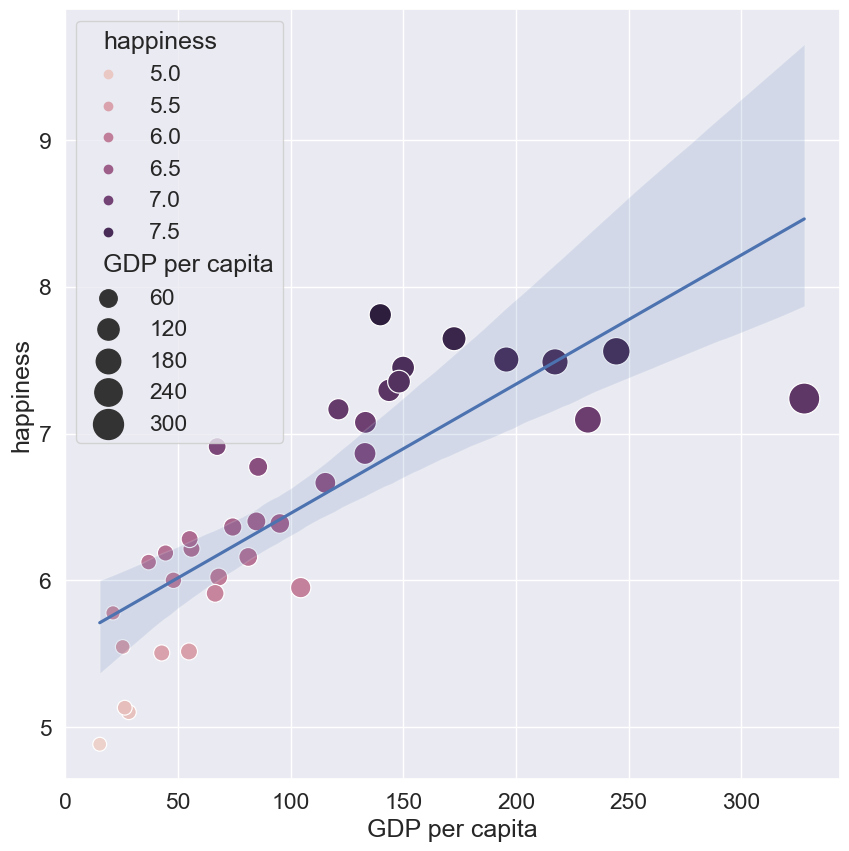

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.scatterplot(x='GDP per capita', y='happiness', data=dataset,
                hue='happiness',
                size='GDP per capita',
                sizes=(100, 500),
                legend='brief')

sns.regplot(x='GDP per capita', y='happiness', data=dataset,
            scatter=False)

plt.show()

In light of the data, what do you think about saying that *money can't buy happiness*?

• It seems it can

**Fit the linear model to the dataset $\{(x_i,y_i)\}_{i=1}^N$**. <br>
The linear model: $$\overline{y} = ax+b,$$
where: <br>
$x$ - GDP per capita, <br>
$y$ - happiness (target value)), <br>
$\overline{y}$ - happiness (model prediction for a given value of $x$),<br>
$a, b$ - model parameters. <br><br>
All target values are gathered in:<br>
$Y = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}$, <br>
and the so called model ,,predictions'' in:<br> 
$\overline{Y} = \begin{bmatrix} \overline{y}_1 & \overline{y}_2 & \cdots & \overline{y}_N \end{bmatrix}$.

The warm-up task for you is to adjust the model to the data using **the trial-and-error** approach. Try your guesses/estimates of values of $a$ and $b$ in the code below.

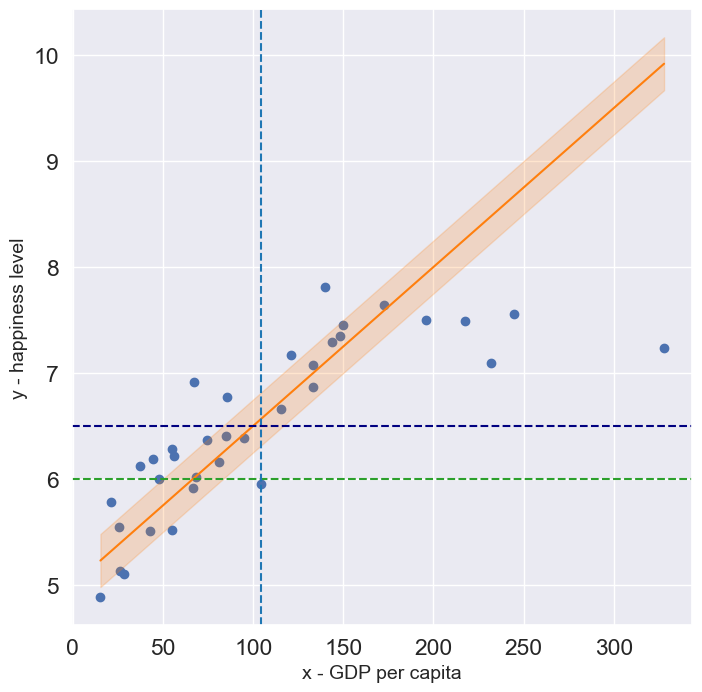

In [6]:
def model(params, x):
    a, b = params
    return a * x + b


plt.figure(figsize=(8, 8))

#  here you put your estimates
a_est, b_est = .015, 5

# the x array for testing is just the span of all values to show as the x-axis
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
# take model predictions for the whole x axis
Y_pred = model(params=[a_est, b_est], x=X_test)
# later on we will call for the predict method of the sklearn library instead

plt.scatter(X, Y)
plt.plot(X_test, Y_pred, color='tab:orange')
plt.xlabel('x - GDP per capita', fontsize=14)
plt.ylabel('y - happiness level', fontsize=14)

# happiness threshold of 6.0
plt.axhline(y=6.0, color='tab:green', linestyle='--')

upper_bound = Y_pred + 0.25  # arbitrary value for demonstration purposes
lower_bound = Y_pred - 0.25  # arbitrary value for demonstration purposes
plt.fill_between(X_test, upper_bound, lower_bound, alpha=0.2, color='tab:orange')

mean_gdp = dataset['GDP per capita'].mean()
mean_happiness = dataset['happiness'].mean()
# mean lines
plt.axvline(x=mean_gdp, color='tab:blue', linestyle='--')
plt.axhline(y=mean_happiness, color='navy', linestyle='--')

plt.show()

**Think about it**: What does it actually mean that the process is linear? How to recognize that the data may be described by a linear equation? <br>
Is the relationship between *GDB per capita* and *happiness level* linear?

• A linear process is a process where the output is directly proportional to the input, with a constant scaling factor. This means that a linear equation will produce a straight line when plotted on a graph.

• One way to recognize that the data may be described by a linear equation is to plot the data on a graph and visually inspect the relationship between the variables. If the plot shows a roughly straight line, it is likely that thee relationship between the variables can be described by a linear equation.

• After analyzing the scatter plot it seems that GDB per capita is correlated with happiness and this relation is approximately linear, but only to a certain point
at which more GDB per capita doesn't provide more happiness

**Approximation error** <br>
For an $i$-the output, the error is:
$$e_i=y_i-\overline{y_i} \quad.$$
Take any of the following aggregates of all errors made by the model on the data $X,Y$:
\begin{equation}
Q(a,b) = \sum_{i=1}^Ne_i^2 \ ,
\tag{1}
\end{equation}
\begin{equation}
Q(a,b) = \frac{1}{N}\sum_{i=1}^Ne_i^2 \ ,
\tag{2}
\end{equation}
\begin{equation}
Q(a,b) = \frac{1}{N}\sqrt{\sum_{i=1}^Ne_i^2}\ .
\tag{3}
\end{equation}

My first estimation: a=0.01500, b=5.00000
Estimated parameters: a=0.00880, b=5.57619
Minimum sum of squared errors: 7.85194


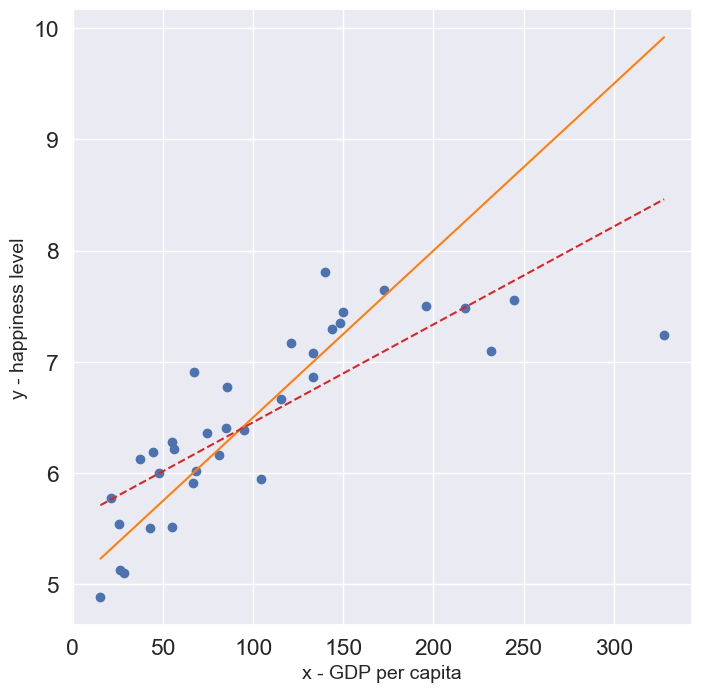

In [7]:
def model(params, x):
    a, b = params
    return a * x + b


plt.figure(figsize=(8, 8))

#  here you put your estimates
a_est, b_est = .015, 5

# the x array for testing is just the span of all values to show as the x-axis
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
# take model predictions for the whole x axis
Y_pred = model(params=[a_est, b_est], x=X_test)
# later on we will call for the predict method of the sklearn library instead

plt.scatter(X, Y)
plt.plot(X_test, Y_pred, color='tab:orange')
plt.xlabel('x - GDP per capita', fontsize=14)
plt.ylabel('y - happiness level', fontsize=14)

from scipy.optimize import minimize


def SSE(params):
    Y_pred = model(params, X)
    return ((Y - Y_pred) ** 2).sum()


# initial guess for parameters
params2 = [0, 0]

# minimize the sum of squared errors
res2 = minimize(SSE, params2)

# print the estimated parameters and the minimum sum of squared errors
print(f"My first estimation: a={a_est:.5f}, b={b_est:.5f}")
print(f"Estimated parameters: a={res2.x[0]:.5f}, b={res2.x[1]:.5f}")
print(f"Minimum sum of squared errors: {res2.fun:.5f}")
plt.plot(X_test, model(params=[res2.x[0], res2.x[1]], x=X_test), color='tab:red', linestyle='--')

plt.show()

My first estimation: a=0.01500, b=5.00000
Estimated SSE parameters: a=0.00880, b=5.57619
Minimum SSE: 7.85194
Estimated MSE parameters: a=0.00880, b=5.57619
Minimum MSE: 0.22434
Estimated RMSE parameters: a=0.00880, b=5.57619
Minimum RMSE: 0.08006


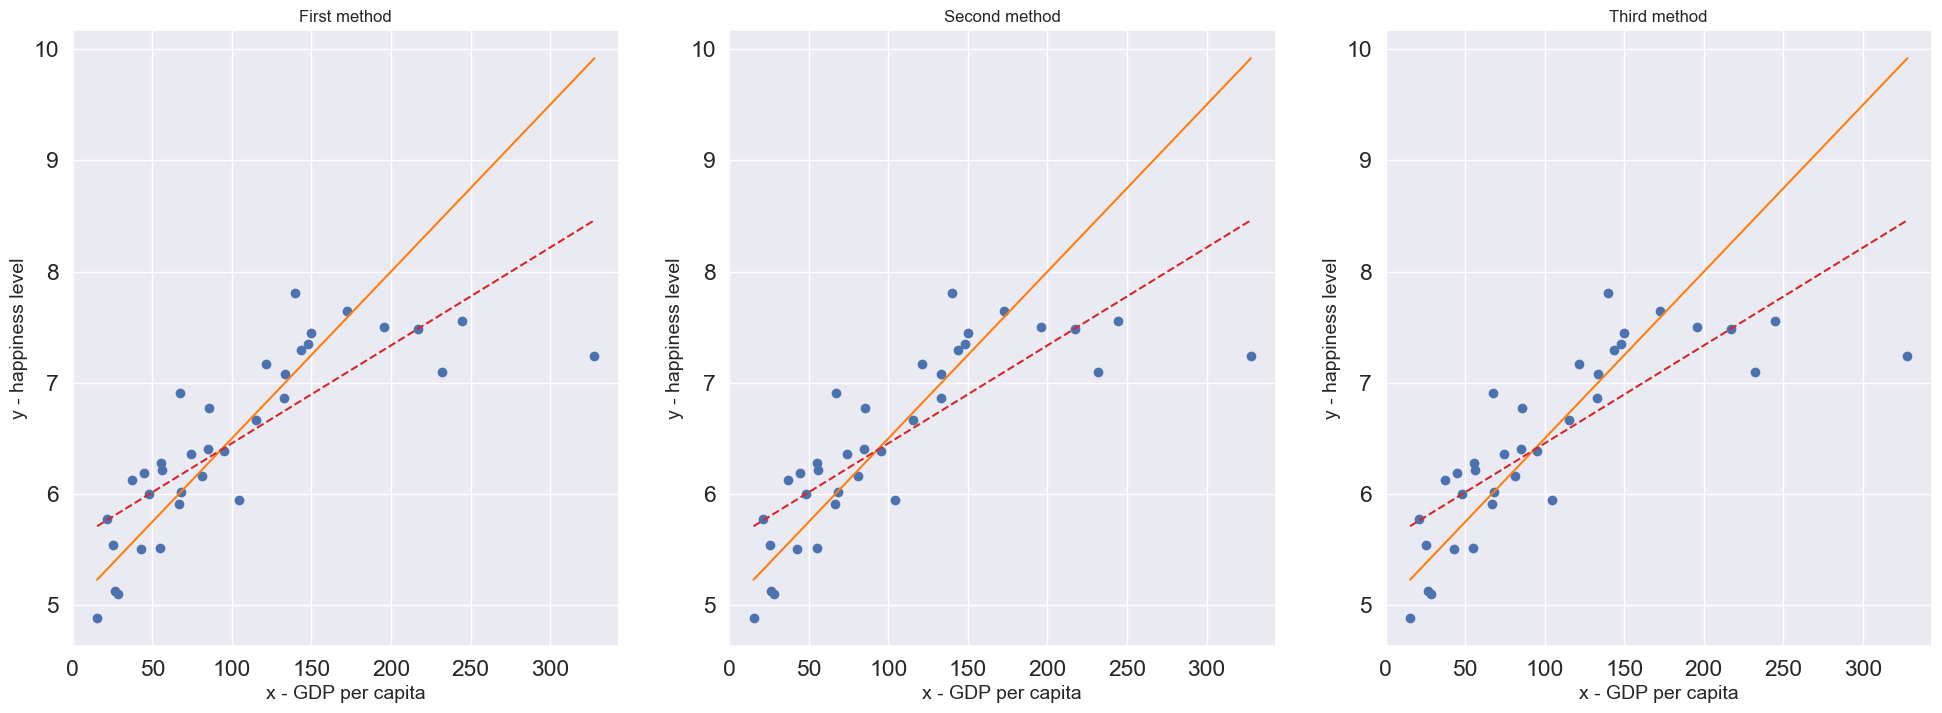

In [8]:
def model(params, x):
    a, b = params
    return a * x + b


fig, ax = plt.subplots(1, 3, figsize=(24, 8))

#  here you put your estimates
a_est, b_est = .015, 5

# the x array for testing is just the span of all values to show as the x-axis
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
# take model predictions for the whole x-axis
Y_pred = model(params=[a_est, b_est], x=X_test)
# later on we will call for the predict method of the sklearn library instead


titles = ['First method', 'Second method', 'Third method']
for i, x in enumerate(ax):
    x.scatter(X, Y)
    x.plot(X_test, Y_pred, color='tab:orange')
    x.set_xlabel('x - GDP per capita', fontsize=14)
    x.set_ylabel('y - happiness level', fontsize=14)
    x.set_title(titles[i], fontsize=12)

from scipy.optimize import minimize


# Compute the sum of squares error (SSE)
def SSE(params):
    Y_pred = model(params, X)
    return ((Y - Y_pred) ** 2).sum()


# Compute the mean squared error (MSE)
def MSE(params):
    N = len(Y)
    Y_pred = model(params, X)
    return ((Y - Y_pred) ** 2).sum() / N


# Compute the root mean of squared error (RMSE)
def RMSE(params):
    N = len(Y)
    Y_pred = model(params, X)
    return np.sqrt(((Y - Y_pred) ** 2).sum()) / N


# initial guess for parameters
params2 = [0, 0]
params3 = [0, 0]
params4 = [0, 0]
# minimize the sum of squared errors
res2 = minimize(SSE, params2)
res3 = minimize(MSE, params3)
res4 = minimize(RMSE, params4)
print(f"My first estimation: a={a_est:.5f}, b={b_est:.5f}")
print(f"Estimated SSE parameters: a={res2.x[0]:.5f}, b={res2.x[1]:.5f}")
print(f"Minimum SSE: {res2.fun:.5f}")
print(f"Estimated MSE parameters: a={res3.x[0]:.5f}, b={res3.x[1]:.5f}")
print(f"Minimum MSE: {res3.fun:.5f}")
print(f"Estimated RMSE parameters: a={res4.x[0]:.5f}, b={res4.x[1]:.5f}")
print(f"Minimum RMSE: {res4.fun:.5f}")
ax[0].plot(X_test, model(params=[res2.x[0], res2.x[1]], x=X_test), color='tab:red', linestyle='--')
ax[1].plot(X_test, model(params=[res3.x[0], res3.x[1]], x=X_test), color='tab:red', linestyle='--')
ax[2].plot(X_test, model(params=[res4.x[0], res4.x[1]], x=X_test), color='tab:red', linestyle='--')

plt.show()

**Extend** the previous cell with the code by the value of an approximation error and repeat the trial-and-error method. <br>
**Think about it**: does it matter which criteria of $(1)$, $(2)$, $(3)$ you use to measure the model quality?

• It does not matter which criteria we use, the sum will be different, but our parameters optimal parameters won't change

In the cell below, you can see again the same code. This time the task is **to determine the model parameters using the analytic formula** solved as a result of a homework exercise. Compare the approximation error for the analytic solution with your previous estimate of $a$ and $b$. <br>
**Think about it**: is it possible to outperform the analytical method?
• It is possible to outperform the analytical method in terms of computational efficiency by using numerical optimization algorithms, such as gradient descent, to find the values of the model parameters that minimize the sum of squared errors (SSE) on the training data.
• These algorithms can be more flexible and powerful than the analytical method, as they can handle non-linear models and non-convex optimization problems.

**Apply** the multidimensional version of the approximation algorithm made for linear systems:
\begin{equation}
\widehat{\theta} = (XX^T)^{-1} XY^T, 
\tag{4}
\end{equation}
where $\theta = \begin{bmatrix} a \\ b \end{bmatrix}$. This requires the design of the matrix $X$. Try doing this in only two lines of code.

Algorithm (4) is implemented in the `sklearn` library (covered later on) by the procedure `fit` belonging to the `LinearRegression` class. Parameters $a$ are stored in variable `coef_` and bias $b$ in variable `intercept_`.

In [9]:
import numpy as np

# design matrix
X2 = np.vstack((np.ones(len(X)), X))
#print(X2.dot(X2.T))
#print(np.linalg.inv(X2.dot(X2.T)))
#print(Y)

# parameter estimation using the normal equation
theta_hat = np.linalg.inv(X2.dot(X2.T)).dot(X2).dot(Y.T)

# print the estimated parameters
print(f"Estimated parameters:\na={theta_hat[1]:.5f}\nb={theta_hat[0]:.5f}")


Estimated parameters:
a=0.00880
b=5.57619


In [10]:
# USING LIBRARY

from sklearn.linear_model import LinearRegression


def model(theta, X):
    return np.dot(X, theta)


# create the linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X.reshape(-1, 1), Y)

# print the estimated parameters
print(f"Estimated parameters: a={model.coef_[0]:.5f}, b={model.intercept_:.5f}")


Estimated parameters: a=0.00880, b=5.57619


**Generalized Linear Model (GLM)** <br>
Take the following model:
\begin{equation}
\overline{y} = \sum_{m=0}^M \theta_m \phi_m(x),
\tag{5}
\end{equation}
where $\theta \in \Re^{M+1}$ is a vector of parameters and $\phi_m$ are the so-called basis functions. Perform the model fit to the data. <br>
Take any collection of basis functions you wish (for example, you may start from monomials).<br>
Create measurement matrices $X, Y$ in such a way that the formula (4) can be used to find estimates $\widehat{\theta}$.

**Experiment with GLM**. Start with a low number of basis functions $M$ and gradually increase it, making the model more complex. Observe the relation between the approximation error and the complexity of the model. <br>
**Think about it**: Given a collection of different models, which one is the best? Is it that one having the smallest approximation error? Do you prefer complex or simple models? 

**Remark**. Labs number 5 improve your numerical optimization skills. You will be able to provide your own designed models and not depend on what a library offers you.

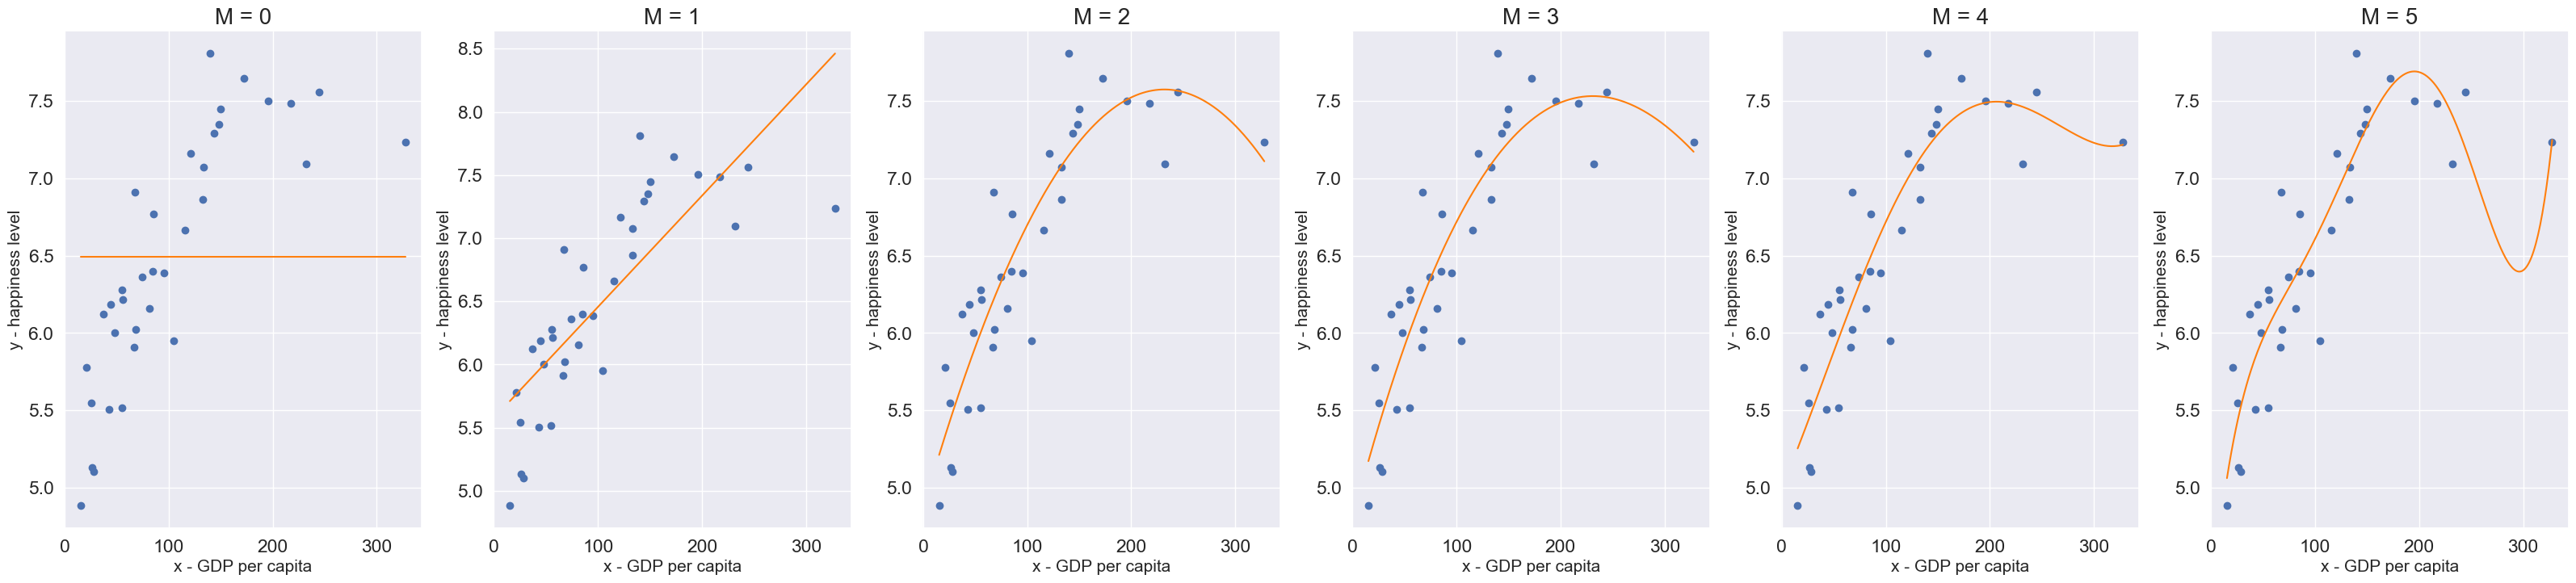

In [11]:
import numpy as np

# parameter M
M = 5
fix, ax = plt.subplots(1, M + 1, figsize=(M * 8, 8))

for i, x in enumerate(ax):
    Y2 = np.zeros((i + 1, len(X)))

    #print(Y2)

    for m in range(i + 1):
        Y2[m, :] = X ** m

    #print(Y2)
    #theta_hat = np.linalg.inv(X2.dot(X2.T)).dot(X2).dot(Y.T)
    theta_hat = np.linalg.inv(Y2.dot(Y2.T)).dot(Y2).dot(Y.T)

    X_test = np.linspace(start=X.min(), stop=X.max(), num=300)

    GLM = np.zeros(len(X_test))
    for i, theta in enumerate(theta_hat):
        GLM += theta * X_test ** i

    if i == 2:
        pass
        #print(X_test)

    x.set_title("M = " + str(i), fontsize=20)
    x.set_xlabel('x - GDP per capita', fontsize=15)
    x.set_ylabel('y - happiness level', fontsize=15)

    x.scatter(X, Y)
    x.plot(X_test, GLM, color='tab:orange')

plt.show()


### How to generate a synthetic dataset
*The least-suares method* deserves its name in random conditions (variable y is affected by disturbances, measurements are inaccurate, etc.). <br>
The following is the code to generate synthetic data sets that may serve to investigate the properties of the LS method. <br>
The input values $\{x_i\}_{i=1}^N$ are drawn from a given distribution, then the non-disturbed ouptpus $y_i$ is derived from a given model equation::
$$ \overline{y}_i = F(\theta,x_i)$$ 
having the values of the parameters $\theta$ fixed and known beforehand. As a final step, disturbances $z_i$ are drawn from a given distribution and imposed (added or multiplied) on output values:
$$ y_i = \overline{y}_i + z_i$$
or
$$ y_i = \overline{y}_i \cdot z_i \quad.$$
Two matrices $X, Y$ are returned:
$$X = \begin{bmatrix} x_1 & x_2 & \cdots & x_N \end{bmatrix},$$
$$Y = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix},$$
but the matrix
$$Z = \begin{bmatrix} z_1 & z_2 & \cdots & z_N \end{bmatrix}$$
remains hidden. <br>

In [12]:
# pdf - probability distribution function
def generator(pdf_x, model, pdf_z, type_z):
    # entries of the matrix X are drawn from the distribution pdf_x,
    # 'model' parameters have to be determined inside this object
    # the entries of the matrix Z are drawn from the distribution pdf_z
    # type_z may take two values: 'additive' or 'multiplicative'

    X = pdf_x()
    Y_pred = model(X)
    #print(X.shape)
    if type_z == 'additive':
        Y = Y_pred + pdf_z()
    elif type_z == 'multiplicative':
        Y = Y_pred * pdf_z()

    return X, Y

# do not worry if you can't get the idea behind this code at the moment
# the next code cell illustrates the usage of the generator

Do not be concerned if you do not remember/like/know the functional programming paradigm. You do not need to fully comprehend the `generator` code. It is enough to be able to use it for your purposes. The example below illustrates how convenient is the `lambda` function. Try this code for different probability distributions of the variables $x$ and $z$. 

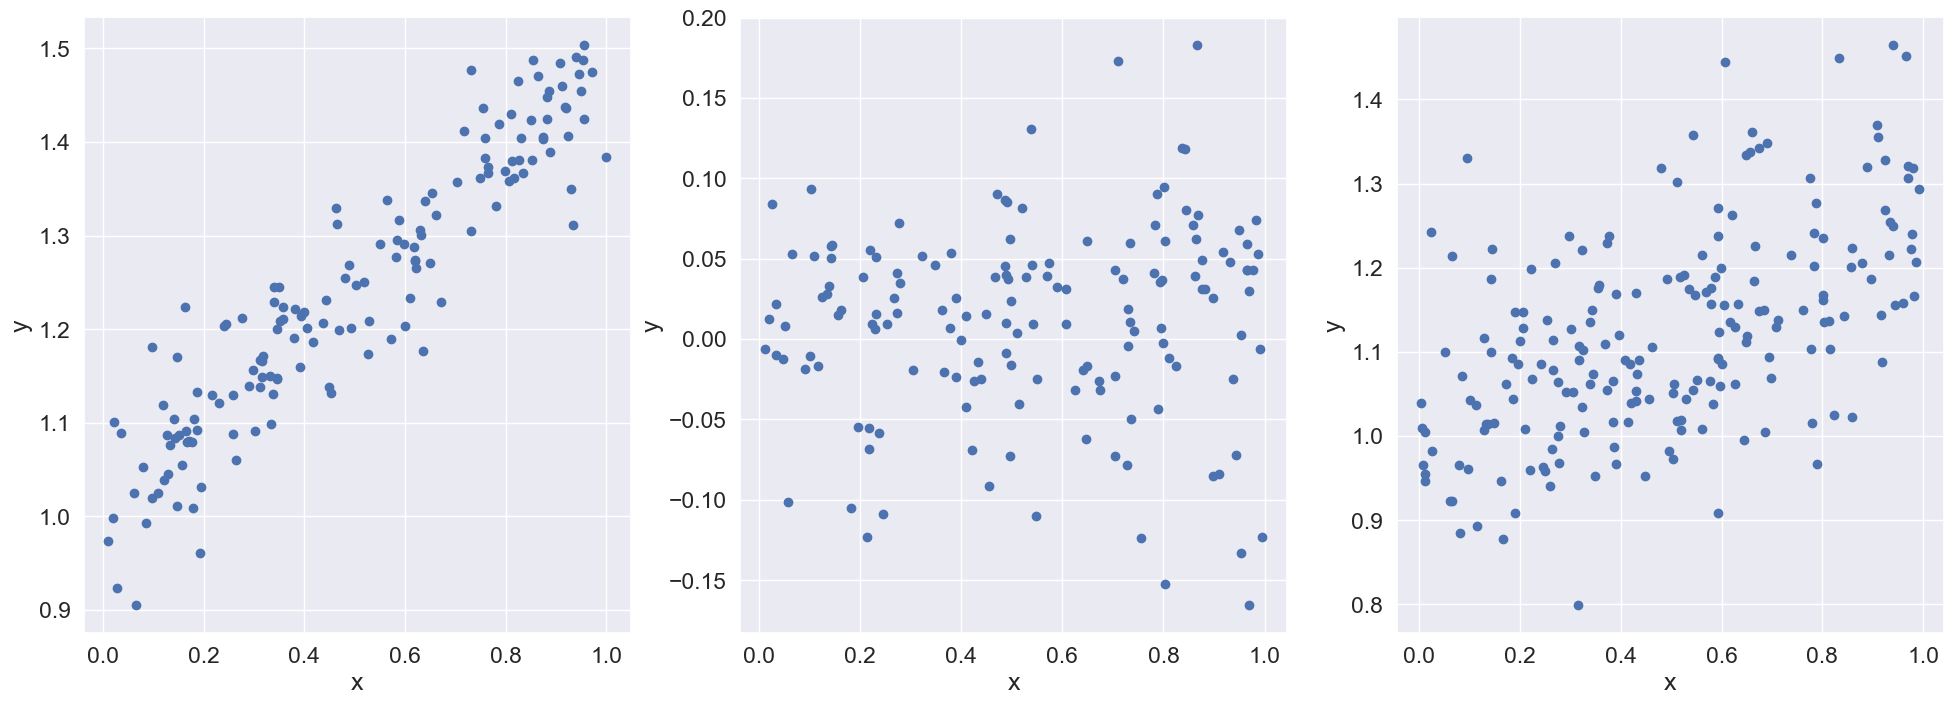

In [13]:
def model(params, x):
    a, b = params
    return a * x + b


fig, ax = plt.subplots(1, 3, figsize=(24, 8))
for i, x in enumerate(ax):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

N = 150
X, Y = generator(lambda: np.random.uniform(low=0, high=1, size=N),
                 lambda x: model(params=[0.5, 1], x=x),
                 lambda: np.random.normal(loc=0, scale=0.05, size=N),
                 type_z='additive')
ax[0].scatter(X, Y)

X, Y = generator(lambda: np.random.uniform(low=0, high=1, size=N),
                 lambda x: model(params=[0.5, 1], x=x),
                 lambda: np.random.normal(loc=0, scale=0.05, size=N),
                 type_z='multiplicative')
ax[1].scatter(X, Y)

N = 200
X, Y = generator(lambda: np.random.uniform(low=0, high=1, size=N),
                 lambda x: model(params=[0.25, 1], x=x),
                 lambda: np.random.normal(loc=0, scale=0.1, size=N),
                 type_z='additive')
ax[2].scatter(X, Y)

plt.show()


**Research task** <br>
Let us pretend that we forgot the values of the model parameters $\theta$ after the data was generated. We only know that disturbances were additive, normally distributed around $0$ and known standard deviation (parameter `scale` of the procedure `normal`). <br>
The task is to investigate the behavior of the estimation error $\theta - \widehat{\theta}$ as a function of the size of the dataset $N$ and the value of the standard deviation. Perform simulation study trying to get as much us of the code above as possible.


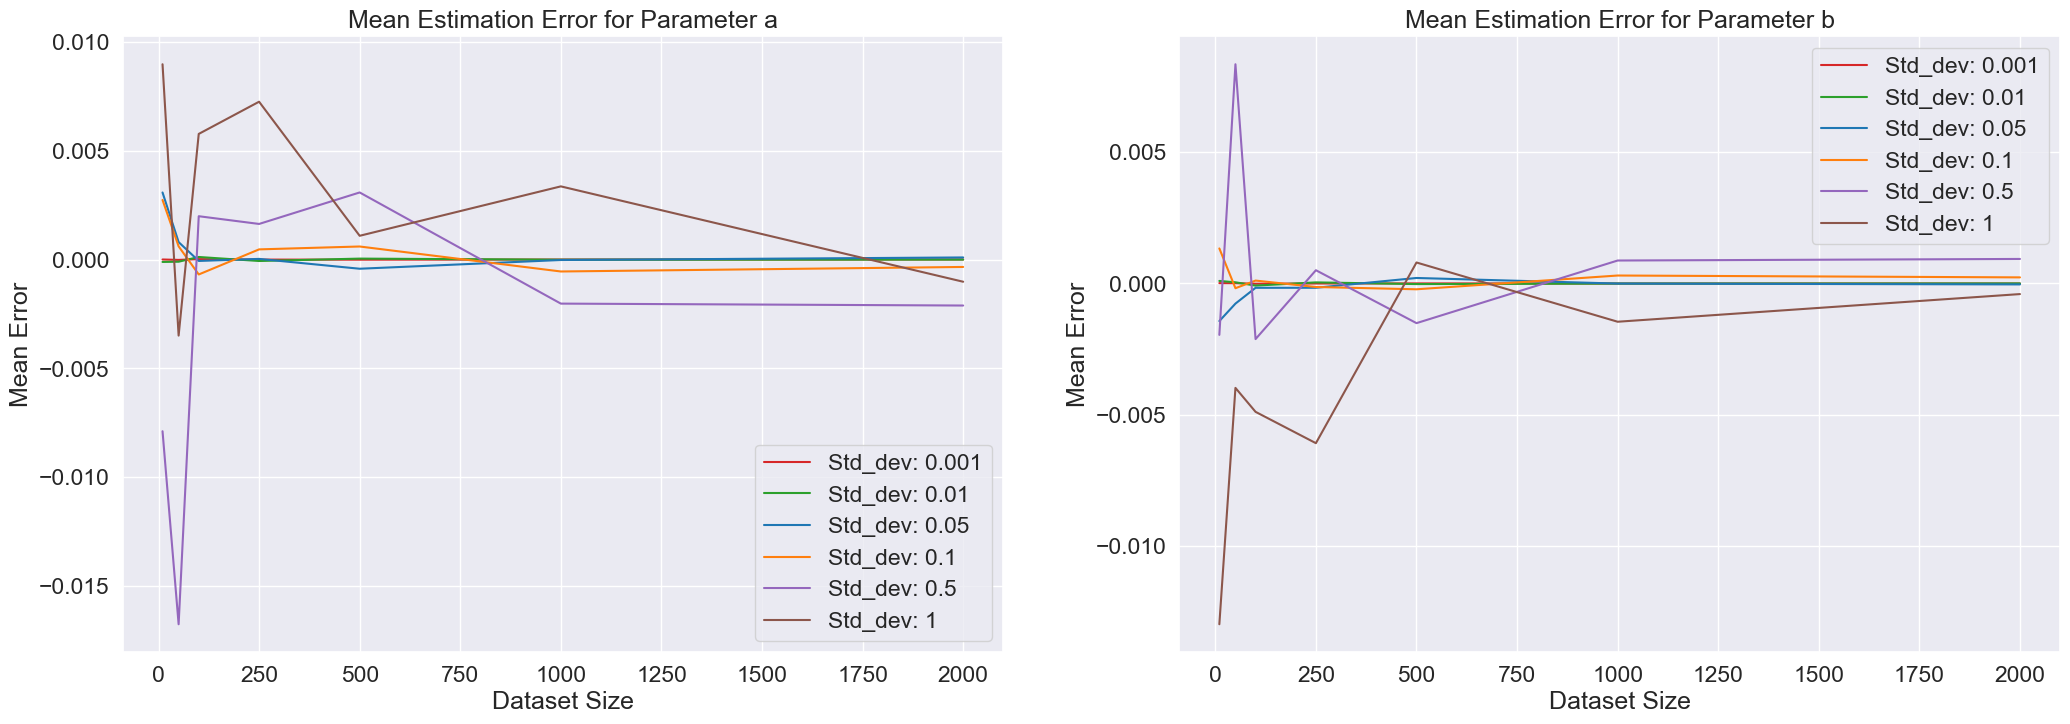

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def LST(X, Y):
    X2 = np.column_stack((X, np.ones_like(X)))
    theta = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(Y)
    return theta



def simulation_study(sizes, std_devs, trials):
    errors = np.zeros((len(sizes), len(std_devs), trials, 2))
    true_params = np.array([0.5, 1])

    for i, N in enumerate(sizes):
        for j, stddev in enumerate(std_devs):
            for trial in range(trials):
                X, Y = generator(lambda: np.random.uniform(low=0, high=1, size=N),
                                 lambda x: model(params=true_params, x=x),
                                 lambda: np.random.normal(loc=0, scale=stddev, size=N),
                                 type_z='additive')

                theta = LST(X, Y)
                errors[i, j, trial] = true_params - theta

    return errors


# params
dataset_sizes = [10, 50, 100, 250, 500, 1000, 2000]
std_dev = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
num_trials = 1000

errors = simulation_study(dataset_sizes, std_dev, num_trials)

mean_errors = np.mean(errors, axis=2)
std_errors = np.std(errors, axis=2)

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown']

for i, stddev in enumerate(std_dev):
    ax[0].plot(dataset_sizes, mean_errors[:, i, 0], label=f"Std_dev: {stddev}",color=colors[i])
    ax[1].plot(dataset_sizes, mean_errors[:, i, 1], label=f"Std_dev: {stddev}",color=colors[i])

ax[0].set_title("Mean Estimation Error for Parameter a")
ax[0].set_xlabel("Dataset Size")
ax[0].set_ylabel("Mean Error")
ax[0].legend()

ax[1].set_title("Mean Estimation Error for Parameter b")
ax[1].set_xlabel("Dataset Size")
ax[1].set_ylabel("Mean Error")
ax[1].legend()

plt.show()

### The [Scikit-learn](https://scikit-learn.org/stable/) library

Machine learning procedures performing regression, classification, clustering, fitting pdf's to samples of data, available in Scikit-learn are called *estimators*. <br>
The usage of Scikit-learn estimators is unified. Here we have an example of a linear regression.

1. Import a class that implements an *estimator* 

In [15]:
from sklearn.linear_model import LinearRegression

2. Create an object instance

In [16]:
model_lin = LinearRegression()

3. Fit the *estimator* to dataset using the `fit` procedure: see the comment below the algorithm (4).

In [17]:
model_lin.fit(X.reshape(-1, 1), Y)

LinearRegression()

4. Make predictions using the `predict` procedure that belongs to to the *estimator* object.

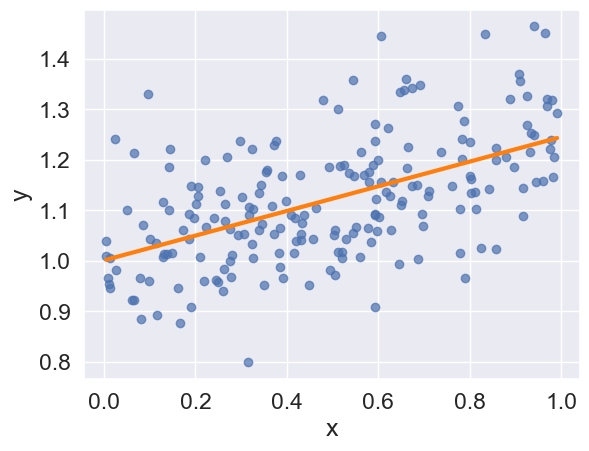

In [18]:
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1, 1))

plt.scatter(X, Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Display the values of the model parameters.

In [19]:
print(f'Parameters of linear model: a = {np.round(model_lin.coef_, 5)}, b = {np.round(model_lin.intercept_, 5)}')

Parameters of linear model: a = [0.24434], b = 1.0012


In the following, we have a few routines commonly applied for the purpose of model fit

Splitting the dataset into training and testing parts.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Evaluation of the quality of the model.

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model_lin.predict(X.reshape(-1, 1)))

0.010519025624497236

This **example** illustrates the unification of the usage of Scikit-learn *estimators*. 

Parameters of linear model: [0.00844], 5.56628
Mean squared error of the linear model: 0.205

Parameters of GLM: [ 0.      0.0225 -0.    ], 4.87904
Mean squared error of the GLM: 0.108

Mean squared error of the SVR: 0.16


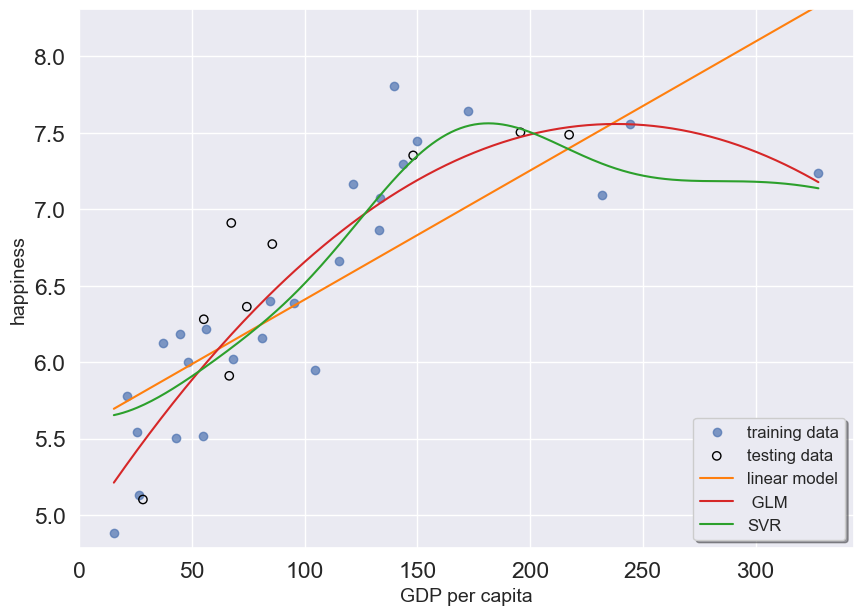

In [22]:
X = dataset['GDP per capita'].values
Y = dataset['happiness'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# =========  Linear model =========
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1, 1),
              Y_train)
print(f'Parameters of linear model: {np.round(model_lin.coef_, 5)}, {np.round(model_lin.intercept_, 5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1, 1)))
print(f'Mean squared error of the linear model: {MSE_lin:0.3}\n')

# ===== Generalized Linear Model =====
from sklearn.preprocessing import PolynomialFeatures

model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1, 1)),
              Y_train)
print(f'Parameters of GLM: {np.round(model_GLM.coef_, 4)}, {np.round(model_GLM.intercept_, 5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1, 1))))
print(f'Mean squared error of the GLM: {MSE_GLM:0.3}\n')

#==== Support Vector Machine ====
# SVR is for regression, SVC is for classification
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X_train.reshape(-1, 1),
              Y_train)
MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1, 1)))
print(f'Mean squared error of the SVR: {MSE_SVR:0.3}')

# Predictions of all models for the span of X axis
xx = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(xx.reshape(-1, 1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(xx.reshape(-1, 1)))
y_svr_pred = model_svr.predict(xx.reshape(-1, 1))

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, label='training data', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='testing data')
plt.plot(xx, y_lin_pred, label='linear model', color='tab:orange')
plt.plot(xx, y_GLM_pred, label=f' GLM', color='tab:red')
plt.plot(xx, y_svr_pred, label='SVR', color='tab:green')
plt.xlabel(dataset.columns[0], fontsize=14)
plt.ylabel(dataset.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min() - 0.1, Y.max() + 0.5])
plt.show()